In [1]:
from djccx.frd.readfrd import readfrd
from matplotlib import pyplot as plt
from validation.FullExperimental import FullExperimental
import os, glob
import numpy as np
from AnalyticalLayers.models import Tau_model
import pandas as pd


In [2]:
params = {
            "geo" : {
                        "t_n" : 2.934,
                        "t_l" : 0.475,
                        "Lx"  : 30,
                        "Ly"  : 25,
                        "meshsizefactor" : 1.2,
                    },
            "sim" : {
                        "disp" : 5.0,
                    },
            "tensile" : {
                        "disp" : 2.0,
                    },
        }



In [3]:
epsilon_tensile = params["tensile"]["disp"] / params["geo"]["Ly"]
eps_span = np.linspace(0, epsilon_tensile, 4)
print(eps_span)

[0.         0.02666667 0.05333333 0.08      ]


In [4]:
composition = [
        ["Y", "Y"],
        ["Y", "X"],
        ["Y", "SX"],
        ["Y", "SY"],
        ["Y", "SX" , "SY"],
        ["Y", "X"  , "SY"]
    ]
ni = [ len(c) for c in composition ]

In [5]:
tn = params["geo"]["t_n"]
tl = params["geo"]["t_l"]
Lx = params["geo"]["Lx"]

tt = [ Tau_model(tn,tl,ini) for ini in ni ]
tt = np.array(tt)
tt

array([4.834, 4.834, 4.834, 4.834, 5.784, 5.784])

In [6]:
df_exp = FullExperimental() 

In [7]:
df_exp.pop("Eb [GPa]")
df_exp.pop("Et [GPa]")
df_exp.pop("Vc")

Name
TFP1    0.178
TFP2    0.164
TFP3    0.135
TFP4    0.144
TFP5    0.146
TFP6    0.180
Name: Vc, dtype: float64

In [8]:
st_df_path = r"C:\Users\djoroya\Documents\GitHub\CITISENS_Composite_v2\scripts_finals\01_metodo\02_flexion\04_optim_stress\Sl.csv"
st_df_path = "../../../scripts_finals/01_metodo/02_flexion/04_optim_stress/Sl.csv"
df_st = pd.read_csv(st_df_path)
df_st

,Unnamed: 0,0
0,S_fibra,651.843390
1,S_matrix,620.945570
2,S_X,473.050229
3,S_SX,195.889233
4,S_Y,266.080492
5,S_SY,93.029122


In [9]:
df_pred_path = r"C:\Users\djoroya\Documents\GitHub\CITISENS_Composite_v2\scripts_finals\01_metodo\02_flexion\04_optim_stress\df_pred.csv"
df_pred_path = "../../../scripts_finals/01_metodo/02_flexion/04_optim_stress/df_pred.csv"
df_pred = pd.read_csv(df_pred_path)
df_pred

,Name,Et [GPa],Eb [GPa],St [MPa],Sb [MPa]
0,TFP1,9.178763,13.818303,111.044465,167.173511
1,TFP2,6.852442,9.260485,82.900688,139.435686
2,TFP3,6.509369,8.588324,78.750199,129.314905
3,TFP4,6.503316,8.576464,72.195440,95.210137
4,TFP5,6.816613,7.803995,75.673452,86.634698
5,TFP6,7.103338,8.196376,78.856476,90.990658


In [10]:
# St = np.array([254.673131,  # TFP1
#                164.532862,  # TFP2
#                137.191090,  # TFP3
#                117.631645,  # TFP4
#                109.185026,  # TFP5
#                117.132917	]) # TFP6

St = df_pred["Sb [MPa]"].values
St.tolist()

[167.1735112685771,
 139.43568643837844,
 129.3149047640252,
 95.2101371871304,
 86.63469791357055,
 90.9906576662027]

In [11]:

results = pd.read_csv("output.csv")

In [12]:
frds = glob.glob("output/*/sim/*.frd")
inps = glob.glob("output/*/sim/*.inp")


In [13]:
frds = sorted(frds)
inps = sorted(inps)
                                      

In [14]:
frds

['output/TFP1/sim/main.frd',
 'output/TFP2/sim/main.frd',
 'output/TFP3/sim/main.frd',
 'output/TFP4/sim/main.frd',
 'output/TFP5/sim/main.frd',
 'output/TFP6/sim/main.frd']

In [15]:
inps

['output/TFP1/sim/main.inp',
 'output/TFP2/sim/main.inp',
 'output/TFP3/sim/main.inp',
 'output/TFP4/sim/main.inp',
 'output/TFP5/sim/main.inp',
 'output/TFP6/sim/main.inp']

In [16]:
from djccx.inp.inp import inp

Wine está instalado. Versión: wine-9.0
Wine is installed. Calculix will be run with windows binary


Authorization required, but no authorization protocol specified
Authorization required, but no authorization protocol specified
Authorization required, but no authorization protocol specified


In [17]:

inp_f = inp(inps[0])
ifrd = readfrd(frds[0])

LAYERS =  inp_f.elements
nodes = LAYERS[0].GetUniqueNodes(inp_f.nodes)

zuniques = nodes["z"].unique()
# near mid
id_z = np.argmin(np.abs(zuniques - nodes["z"].mean()))
z = zuniques[id_z]

nodes = nodes[nodes["z"] == z]

nodes = inp_f.nodes
NSET_LOAD = inp_f.select("NSET_LOAD","nset")
nodes = NSET_LOAD.GetNodes(inp_f.nodes)


In [18]:
df_st.T

,0,1,2,3,4,5
Unnamed: 0,S_fibra,S_matrix,S_X,S_SX,S_Y,S_SY
0,651.84339,620.94557,473.050229,195.889233,266.080492,93.029122


In [19]:
St_layers = {
    "X"   : df_st.T[2].values[1],
    "SX"  : df_st.T[3].values[1],
    "Y"   : df_st.T[4].values[1],
    "SY"  : df_st.T[5].values[1],
    "nucleo" : 0.0,
}

# Predicciones del modelo analitico
Sb_TFP =  df_pred["Sb [MPa]"].values

In [20]:
from AnalyticalLayers.models import Tau_model

ni = [ len(c) for c in composition ]
tt = [ Tau_model(params["geo"]["t_n"],params["geo"]["t_l"],ini) for ini in ni ]

In [21]:
from scipy.interpolate import LinearNDInterpolator


In [22]:
 # interpo x,y,z,f

def PostProcessing(TPF):

    inp_f = inp(inps[TPF])
    ifrd = readfrd(frds[TPF])
    LAYERS =  inp_f.elements

    B = params["geo"]["Ly"]

    icomp = [ *composition[TPF][::-1] , "nucleo", *composition[TPF] ]

    print(icomp)

    rr = []
    L = 2*params["geo"]["Lx"]

    for data in ifrd["data_blocks"]:
        
        # ========================
        # Principal Stress
        # ========================
        P1s = []
        print("Time Step:")
        nodes_lines = []

        
        for idx in range(len(LAYERS)):
            nodes = LAYERS[idx].GetUniqueNodes(inp_f.nodes)

            zmin_to_eval = nodes["z"].min()

            x0 = 0
            y0 = B/2
            eps = 0.2

            nodes = nodes[nodes["x"] > x0 - eps]
            nodes = nodes[nodes["x"] < x0 + eps]
            nodes = nodes[nodes["y"] > y0 - eps]
            nodes = nodes[nodes["y"] < y0 + eps]
            
            zmax = nodes["z"].max()
            zmin = nodes["z"].min()
            zlen = zmax - zmin
            factor = 0.3
            zmin_new = zmin + factor*zlen
            zmax_new = zmax - factor*zlen

            nodes = nodes[nodes["z"] > zmin_new]
            nodes = nodes[nodes["z"] < zmax_new]
            # linear regression
            
            P1 = data.loc[nodes.index]["P1"]
            nodes["P1"] = P1

            # linear regression z vs P1
            z_reg  = nodes["z"]
            P1_reg = nodes["P1"]

            A = np.vstack([z_reg, np.ones(len(z_reg))]).T
            m, c = np.linalg.lstsq(A, P1_reg, rcond=None)[0]
            
            P1_reg = m*zmin_to_eval + c

            P1s.append(P1_reg)

            # x0 = 0, y0 = 0 
            nodes_line = nodes.copy()
            nodes_line = nodes[ nodes["x"] == 0 ]
            B   = 25
            eps = 0.5
            nodes_line = nodes_line[ nodes_line["y"] <= B/2 + eps ]
            nodes_line = nodes_line[ nodes_line["y"] >= B/2 - eps ]
            nodes_line["P1"] = data.loc[nodes_line.index]["P1"]
            nodes_lines.append(nodes_line)

        P1s = np.array(P1s)
        
        nodes = inp_f.nodes
        NSET_LOAD = inp_f.select("NSET_LOAD","nset")
        NSET_LOAD.GetNodes(inp_f.nodes)
        F3 = data.loc[NSET_LOAD.GetNodes(inp_f.nodes).index]["F3"]
        F3 = -2*np.sum(F3) # Symmetry of Model

        # force
        B = params["geo"]["Ly"]
        D = tt[TPF]
        L = 2*params["geo"]["Lx"]

        #
        # Medimos la fuerza en la mitad del modelo 
        # y calculamos la transformación a la fuerza que se aplican en los datos experimentales
        #
        sigma_exp = (3/2)*F3*L/(B*D**2)

        r = { 
            "layers"      : icomp       ,
            "P1"          : P1s         ,
            "F3"          : F3          , 
            "sigma_exp"   : sigma_exp   ,
            "nodes_lines" : nodes_lines ,
        }
        rr.append(r)

    
    ly = len(LAYERS)

    P1s =[]
    for i in range(ly):
        P1s.append([ r["P1"][i] for r in rr ])

    F3s = [ r["F3"] for r in rr ]
    S3s = [ r["sigma_exp"] for r in rr ]


    fig = plt.figure(figsize=(4,4))
    colors = ["r","g","b"]

    summary = {
        "layers" : icomp,
        "P1"     : np.array(P1s),
        "F3"     : np.array(F3s),
        "sigma_exp" : np.array(S3s),
    }
    for i,L in enumerate(P1s):
        if i>len(P1s)//2:
            break
        ly = rr[0]["layers"][i]
        St_layer = St_layers[ly]
        if ly != "nucleo":
            label = r"$\sigma_{max}^{"+ly + "} $ (FEM)"
            plt.plot(S3s,L,'.-',label=label,
                        color=colors[i])
            
            nSt = round(St_layer,1)
            label = r"$\sigma_{"+ly+"} = " + str(nSt) + r" \ MPa$ (analytical)"
            plt.axhline(St_layer,
                        linestyle="--",
                        color=colors[i],
                        label=label)
            
    plt.ylabel(r"$\sigma_{max}^{i}$ [MPa]",fontsize=12)
    plt.xlabel(r"$\sigma_{TFP" + str(TPF+1) + "}$ [MPa]",fontsize=12)
    #  Mpa vertical line
    # franja de error 10%
    ylim = plt.gca().get_ylim()
    plt.fill_betweenx([-100,1000],
                        Sb_TFP[TPF]*0.95,
                        Sb_TFP[TPF]*1.05,
                        alpha=0.2,
                        color="k",
                        label=r"$\sigma_{TPF"+str(TPF+1)+"} = " + str(Sb_TFP[TPF]) + r" \ MPa \pm 10 \%$")
    plt.ylim(ylim)
    # Lo cambiamos por una franja con error 10%
    plt.grid()
    # outside

    
    ly = len(LAYERS)
    P1s_end = [ P1[-1] for P1 in P1s ]
    P1s_end = np.array(P1s_end)
    P1s_end = P1s_end[ : ly%2 +1  ]

    alpha = P1s_end/S3s[-1]

    sigma_an =  [ St_layers[ly] for ly in icomp[:ly%2 +1 ] ]
    sigma_an = np.array(sigma_an)

    
    S3_pred = np.min(sigma_an/alpha)

    plt.axvline(S3_pred,linestyle="--",
                color="m",
                label=r"$\sigma_{pred} = " + str(round(S3_pred,1)) + r" \ MPa$")




    plt.title("TFP "+str(TPF+1) + " | Composition: " + str(icomp) )

    plt.legend( bbox_to_anchor=(1.05, 1), 
        loc='upper left', 
        borderaxespad=0.)
    
    print("factor",S3_pred/Sb_TFP[TPF])
    
    return rr, summary

In [23]:
summaries = []

['Y', 'Y', 'nucleo', 'Y', 'Y']
Time Step:
Time Step:
Time Step:
factor 1.0535827287121604


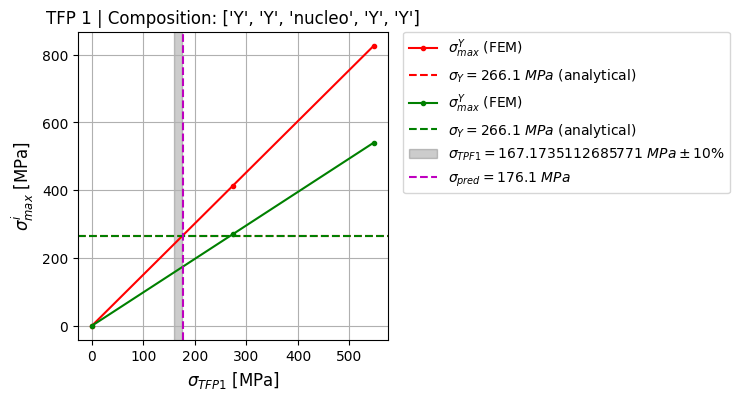

In [24]:
rr,summary = PostProcessing(0)

In [25]:
summaries.append(summary)

In [26]:
P1 = rr[0]["P1"]    

In [27]:
P1

array([0., 0., 0., 0., 0.])

(-200.0, 850.0)

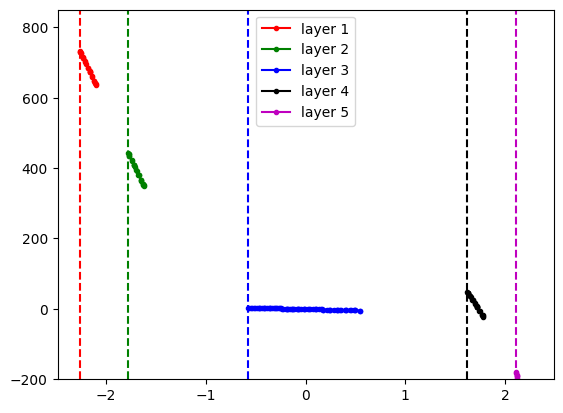

In [28]:
colors = ["r","g","b","k","m","c"]

for i,idf in enumerate(rr[-1]["nodes_lines"]):
    zline = idf["z"]
    zline = np.argsort(zline)
    idf = idf.iloc[zline]
    
    plt.plot(idf["z"],idf["P1"],'.-',label="layer "+str(i+1),color=colors[i])
    # 
    # 
    zmin = idf["z"].min()
    # vertical 
    plt.axvline(zmin,linestyle="--",color=colors[i])


plt.legend()
plt.ylim([-200,850])

['X', 'Y', 'nucleo', 'Y', 'X']
Time Step:
Time Step:
Time Step:
factor 1.2256297913698282


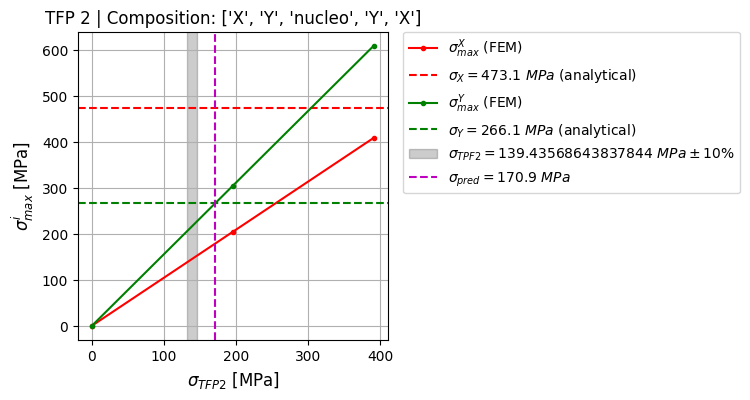

In [29]:
rr,summary = PostProcessing(1)
summaries.append(summary)

(-200.0, 850.0)

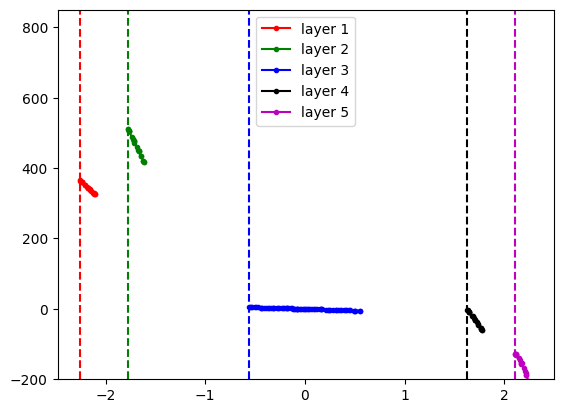

In [30]:
colors = ["r","g","b","k","m","c"]

for i,idf in enumerate(rr[-1]["nodes_lines"]):
    zline = idf["z"]
    zline = np.argsort(zline)
    idf = idf.iloc[zline]
    
    plt.plot(idf["z"],idf["P1"],'.-',label="layer "+str(i+1),color=colors[i])
    # 
    # 
    zmin = idf["z"].min()
    # vertical 
    plt.axvline(zmin,linestyle="--",color=colors[i])


plt.legend()
plt.ylim([-200,850])

['SX', 'Y', 'nucleo', 'Y', 'SX']
Time Step:
Time Step:
Time Step:
factor 1.2069779035861243


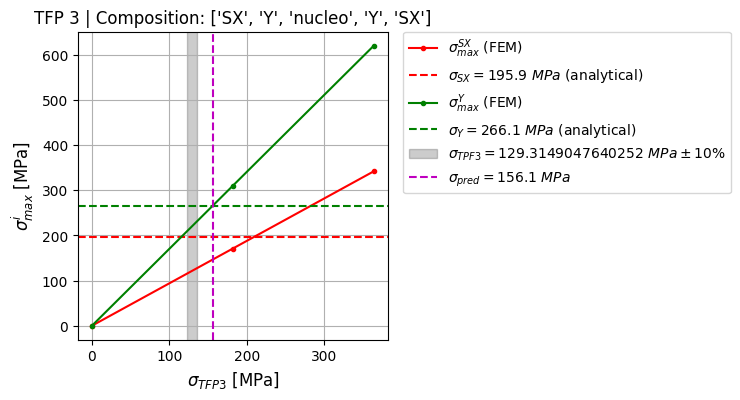

In [31]:
rr,summary = PostProcessing(2)
summaries.append(summary)

(-200.0, 850.0)

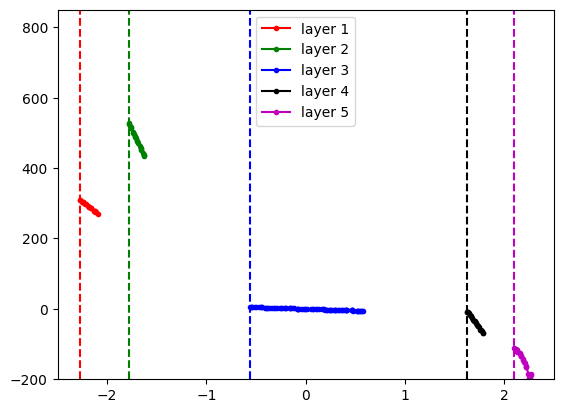

In [32]:
colors = ["r","g","b","k","m","c"]

for i,idf in enumerate(rr[-1]["nodes_lines"]):
    zline = idf["z"]
    zline = np.argsort(zline)
    idf = idf.iloc[zline]
    
    plt.plot(idf["z"],idf["P1"],'.-',label="layer "+str(i+1),color=colors[i])
    # 
    # 
    zmin = idf["z"].min()
    # vertical 
    plt.axvline(zmin,linestyle="--",color=colors[i])


plt.legend()
plt.ylim([-200,850])

['SY', 'Y', 'nucleo', 'Y', 'SY']
Time Step:
Time Step:
Time Step:
factor 1.0512302532556261


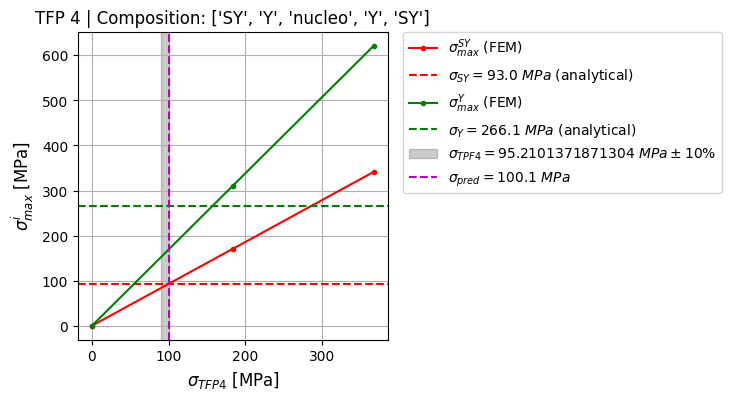

In [33]:
rr,summary = PostProcessing(3)
summaries.append(summary)

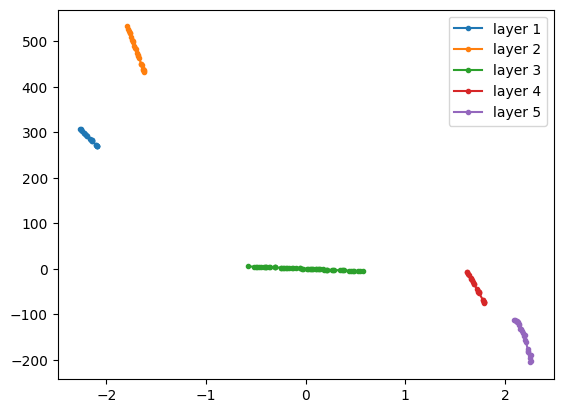

In [34]:
for i,idf in enumerate(rr[-1]["nodes_lines"]):
    zline = idf["z"]
    zline = np.argsort(zline)
    idf = idf.iloc[zline]
    
    plt.plot(idf["z"],idf["P1"],'.-',label="layer "+str(i+1))
plt.legend()

['SY', 'SX', 'Y', 'nucleo', 'Y', 'SX', 'SY']
Time Step:
Time Step:
Time Step:
factor 1.0336611549683892


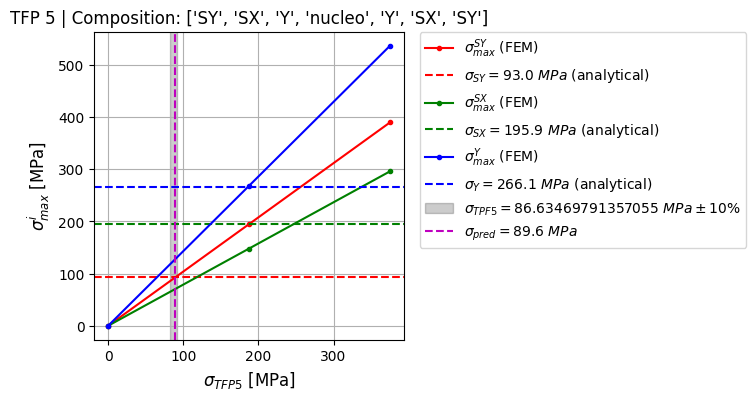

In [35]:
rr,summary = PostProcessing(4)
summaries.append(summary)

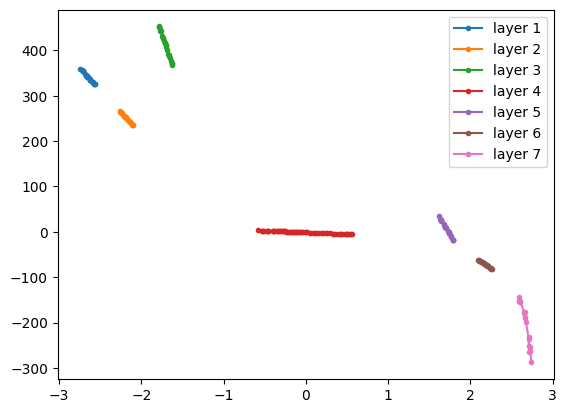

In [36]:
for i,idf in enumerate(rr[-1]["nodes_lines"]):
    zline = idf["z"]
    zline = np.argsort(zline)
    idf = idf.iloc[zline]
    
    plt.plot(idf["z"],idf["P1"],'.-',label="layer "+str(i+1))
plt.legend()

['SY', 'X', 'Y', 'nucleo', 'Y', 'X', 'SY']
Time Step:
Time Step:
Time Step:
factor 1.0225886639186648


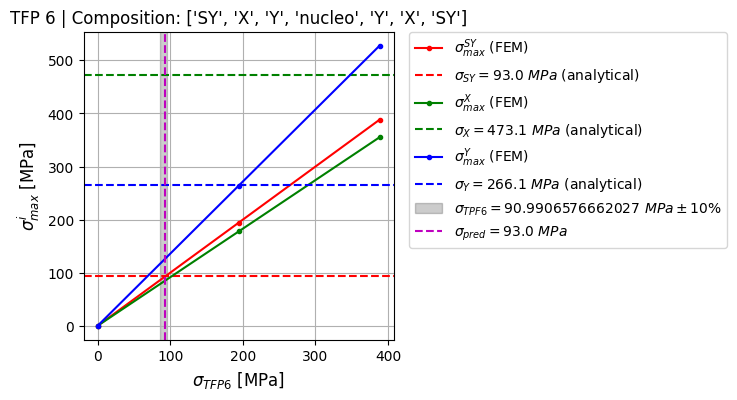

In [37]:
rr,summary = PostProcessing(5)
summaries.append(summary)

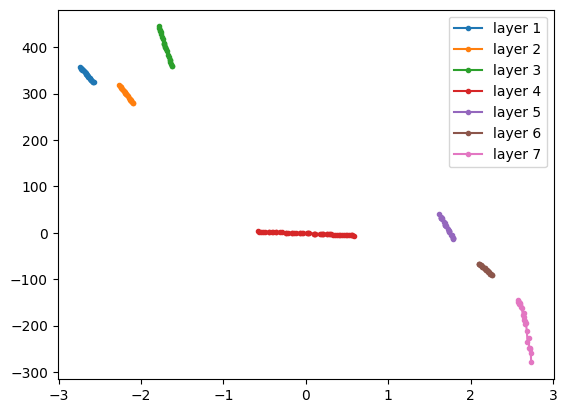

In [38]:
for i,idf in enumerate(rr[-1]["nodes_lines"]):
    zline = idf["z"]
    zline = np.argsort(zline)
    idf = idf.iloc[zline]
    
    plt.plot(idf["z"],idf["P1"],'.-',label="layer "+str(i+1))
plt.legend()

In [39]:
from loadsavejson.savejson import savejson

In [40]:
summaries

[{'layers': ['Y', 'Y', 'nucleo', 'Y', 'Y'],
  'P1': array([[  0.        , 413.25576869, 826.51181991],
         [  0.        , 270.22531936, 540.45045135],
         [  0.        ,   4.86803174,   9.7360622 ],
         [  0.        ,  56.63720131, 113.27447241],
         [  0.        , -12.84337182, -25.68698981]]),
  'F3': array([  -0.     , 1775.63158, 3551.26378]),
  'sigma_exp': array([ -0.        , 273.55336981, 547.10683514])},
 {'layers': ['X', 'Y', 'nucleo', 'Y', 'X'],
  'P1': array([[  0.        , 204.3878652 , 408.77607468],
         [  0.        , 304.56900872, 609.13786302],
         [  0.        ,   6.59593146,  13.1918678 ],
         [  0.        ,  31.33731027,  62.67460963],
         [  0.        , -23.69757538, -47.3952934 ]]),
  'F3': array([  -0.     , 1269.74474, 2539.49054]),
  'sigma_exp': array([ -0.        , 195.61656615, 391.2332956 ])},
 {'layers': ['SX', 'Y', 'nucleo', 'Y', 'SX'],
  'P1': array([[  0.        , 171.10677541, 342.21347514],
         [  0.       

In [41]:
savejson({"summaries":summaries},"summaries.json")